<h1>Introduction</h1>
Instacart is a platform that allows people to place orders online and have them delivered or pick them up at the store. The data provided describes Instacart users' habits: their order frequency and when they place them, what products are in those orders, and what departments and aisles those products are located in. In this project, we will take a closer look at this data and learn about trends in these habits that can help in the decision-making process for both Instacart and grocery stores.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_order = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
display(data_order.head())
data_order.info()

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/instacart_orders.csv'

In [ ]:
data_product = pd.read_csv('/datasets/products.csv', sep=';')
display(data_product.head())
data_product.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
data_aisle = pd.read_csv('/datasets/aisles.csv', sep=';')
display(data_aisle.head())
data_aisle.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
data_department = pd.read_csv('/datasets/departments.csv', sep=';')
display(data_department.head())
data_department.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
data_op = pd.read_csv('/datasets/order_products.csv', sep=';')
display(data_op.head())
data_op.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


As mentioned in the instructions, the order_products data is quite a bit larger than the other datasets. This is not terribly surprising to me as it contains line-item data for each order. I did note while looking at the non-null values that the data is not missing much for how much data exists. It will be interesting to see what product names are lacking though. Having days_since_prior_order is probably because there are missing values. This could impact calculations later on.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [ ]:
# Check for duplicated orders
print(data_order.duplicated().sum())


15


In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
order_wed = data_order.query("order_dow == 2 and order_hour_of_day == 2")['order_id']
print(order_wed)

1295      1474941
2391      1640269
2550      1223696
5965       579194
17680     2004230
           ...   
457660    1562381
460316    1986084
462676    1362113
472800    1746383
472923    1519815
Name: order_id, Length: 136, dtype: int64


In [ ]:
# Remove duplicate orders
data_order = data_order.drop_duplicates().reset_index(drop=True)

In [ ]:
# Double check for duplicate rows
print(data_order.duplicated().sum())

0


In [ ]:
# Double check for duplicate order IDs only
print(data_order['order_id'].value_counts())
print(data_order['order_id'].duplicated().sum())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64
0


To determine orders placed on Wednesday at 2:00 AM, without further information, I used Sunday as day 0. However, I do know that it could be possible that Monday could be day 0 in some parts of the world. 

I initially was checking everything for duplicates based on the order_id column, but then I realized that checking the entire row was more prudent. 

### `products` data frame

In [ ]:
# Check for fully duplicate rows
print(data_product.duplicated().sum())

0


In [ ]:
# Check for just duplicate product IDs
print(data_product['product_id'].duplicated().sum())

0


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
data_product['product_lowercase'] = data_product['product_name'].str.lower()
print(data_product['product_lowercase'].duplicated().sum())

1361


In [ ]:
# Check for duplicate product names that aren't missing
print(data_product['product_lowercase'].value_counts())

green tea with ginseng and honey                3
flat fillets of anchovies in pure olive oil     2
mandarin oranges in light syrup                 2
mediterranean sea salt                          2
protein plus vanilla bean protein shake         2
                                               ..
grilled salmon feast in gravy cat food          1
orange pineapple blast soda                     1
milk                                            1
green super food pineapple lemongrass packet    1
ultra free & clear laundry detergent            1
Name: product_lowercase, Length: 48332, dtype: int64


Here I am not clear if I should be fixing duplicates or leaving them alone. Since product IDs are not duplicated and that is what is in the order DataFrame, my instinct is to leave them alone

### `departments` data frame

In [ ]:
print(data_department.duplicated().sum())

0


In [ ]:
print(data_department['department_id'].duplicated().sum())
data_department['department_lowercase'] = data_department['department'].str.lower()
print(data_department['department_lowercase'].duplicated().sum())
print(data_department['department_lowercase'].value_counts())


0
0
dairy eggs         1
meat seafood       1
canned goods       1
pantry             1
bulk               1
other              1
dry goods pasta    1
produce            1
personal care      1
alcohol            1
pets               1
beverages          1
snacks             1
household          1
frozen             1
international      1
babies             1
deli               1
breakfast          1
bakery             1
missing            1
Name: department_lowercase, dtype: int64


I did similar work for the department data frame that I did for the product data frame. I initially checked for any duplicated rows in their entirety, then broke it down by the individual columns. I checked for ID first and found no duplicates there. For the product name column, I converted everything to lowercase letters first, then called a the sum() and value_count() methods on the new column.

### `aisles` data frame

In [ ]:
print(data_aisle.duplicated().sum())

0


In [ ]:
print(data_aisle['aisle_id'].duplicated().sum())
data_aisle['aisle_lowercase'] = data_aisle['aisle'].str.lower()
print(data_aisle['aisle_lowercase'].unique())
print(data_aisle['aisle_lowercase'].duplicated().sum())
print(data_aisle['aisle_lowercase'].value_counts())


0
['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alternatives'
 'packaged seafood' 'fresh herbs' 'baking ingredients'
 'bulk dried fruits vegetables' 'oils vinegars' 'oral hygiene'
 'packaged cheese' 'hair care' 'popcorn jerky' 'fresh fruits' 'soap'
 'coffee' 'beers coolers' 'red wines' 'honeys syrups nectars'
 'latino foods' 'refrigerated' 'packaged produce' 'kosher foods'
 'frozen meat seafood' 'poultry counter' 'butter' 'ice cream ice'
 'frozen meals' 'seafood counter' 'dog food care' 'cat food care'
 'frozen vegan vegetarian' 'buns rolls' 'eye ear care' 'candy chocolate'
 'mint gum' 'vitamins supplements' 'breakfast bars pastries'
 'packaged poultry' 'fruit vegetable snacks' 'preserved dips spreads'
 'frozen breakfast' 'cream' 'paper goods' 'shave needs' 'diapers wipes'
 'granola' 

I initially checked for any duplicated rows in their entirety, then broke it down by the individual columns. I checked for ID first and found no duplicates there. For the aisle name column, I converted everything to lowercase letters first, then called a few methods on the new column. I called unique() on this column because I could not see everything in value_counts() and I wanted to make sure I was not missing any duplicates. 

### `order_products` data frame

In [ ]:
# Check for fully duplicate rows
print(data_op.duplicated().sum())

0


In [ ]:
# Double check for any other tricky duplicates
print(data_op.duplicated(subset=['order_id', 'product_id']).sum())

0


I looked at the data frame and determined that the most likely duplicated data would be an order ID and product ID combination. The other data is very likely to repeat regardless of its placement.

## Find and remove missing values


### `products` data frame

In [ ]:
# Are all of the missing product names associated with aisle ID 100?
aisle_data = data_product[data_product['product_name'].isna()]['aisle_id']
print(aisle_data.value_counts())

100    1258
Name: aisle_id, dtype: int64


In [ ]:
# Are all of the missing product names associated with department ID 21?
department_data = data_product[data_product['product_name'].isna()]['department_id']
print(department_data.value_counts())

21    1258
Name: department_id, dtype: int64


In [ ]:
# What is this aisle and department?
print(data_department.query("department_id == 21")['department'])
print(data_aisle.query("aisle_id == 100")['aisle'])

20    missing
Name: department, dtype: object
99    missing
Name: aisle, dtype: object


In [ ]:
# Fill missing product names with 'Unknown'
data_product['product_name'] = data_product['product_name'].fillna('Unknown')

print(data_product['product_name'].isna().sum())

0


Are all of the missing product names associated with aisle ID 100?
Answer: Yes

Are all of the missing product names associated with department ID 21?
Answer: Yes

What is this aisle and department?
department = missing
aisle = missing

I filled the product name with Unknown, then ran a query to verify there were no more missing product names. All had been filled in!

### `orders` data frame

In [ ]:
print(data_order.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# Are there any missing values where it's not a customer's first order?
if(data_order['days_since_prior_order'].isna().any()):
    result = data_order.query("order_number == 1")['order_number'].sum()
    
print(result)

28817


No. The number of values missing in the days_since_prior_order column matches the the number of values where the order_number column is equal to 1.

### `order_products` data frame

In [ ]:
data_op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
# What are the min and max values in this column?
print(data_op['add_to_cart_order'].min())
print(data_op['add_to_cart_order'].max())

1.0
64.0


In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_missing_value = data_op[data_op['add_to_cart_order'].isna()]['order_id']
print(order_missing_value)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [ ]:
# Do all orders with missing values have more than 64 products?
print(data_op.query("order_id in @order_missing_value")['add_to_cart_order'].unique())

[57. nan 37. 61.  7. 11. 58. 14.  9. 15. 10. 47. 63. 29. 27. 43. 32. 55.
 41. 26. 39. 20. 18. 56. 21. 59. 34. 38. 22. 30. 36.  4.  8. 54. 33.  3.
 46. 48. 53. 24. 13. 35. 40. 31. 64. 44. 12. 42.  6.  2. 19.  1. 62. 45.
  5. 51. 60. 50. 49. 52. 23. 17. 25. 28. 16.]


In [ ]:
# Replace missing values with 999 and convert column to integer type
data_op['add_to_cart_order'] = data_op['add_to_cart_order'].fillna(999)
print(data_op['add_to_cart_order'].isna().sum())
data_op['add_to_cart_order'] = data_op['add_to_cart_order'].astype('int')
data_op.dtypes

0


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

What are the min and max values in this column?
The min value is 1.0 and the max value is 64.0

Do all orders with missing values have more than 64 products?
They do. The highest value all of the orders have is 64.0. I confirmed this by looking at all the unique values.  

I filled all the missing values with 999 and then checked for missing values, confirming there were none remaining. I then converted the add_to_cart_order datatype to integer, then called dtype to confirm instead of info.



### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
print(data_order['order_hour_of_day'].min())
print(data_order['order_hour_of_day'].max())

0
23


In [ ]:
print(data_order['order_dow'].min())
print(data_order['order_dow'].max())

0
6


I verified that the order_hour_of_day and order_dow were within sensible ranges by finding the min and max values of both columns. Both made sense to me given a twenty-four hour day and a seven-day week.


### [A2] What time of day do people shop for groceries?

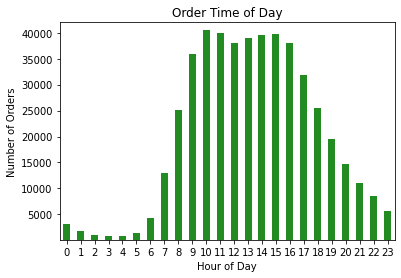

In [ ]:
data_time_of_day = data_order.groupby('order_hour_of_day').count()['order_id']
data_time_of_day.plot(kind='bar',
               x='order_hour_of_day',
               y='order_id',
               xlabel='Hour of Day',
               ylabel='Number of Orders',
               title='Order Time of Day',
               color='forestgreen',
               ylim=[100,42000])
plt.xticks(rotation=0)
plt.show()

It appears that the most common time of day to order groceries is 10 AM. The number of orders remains high until around 5 pm however. What is not clear to me is whether or not this is when people place the order or when the order is delivered. 

To plot this data, I tried a few different kinds of graphs, and a bar graph was the most clear. I think this has to do with the fact that there are 23 finite points in time that the orders can be placed according to the data. I also played with the ylim variable to make sure the results displayed in a readable and accurate manner.

### [A3] What day of the week do people shop for groceries?

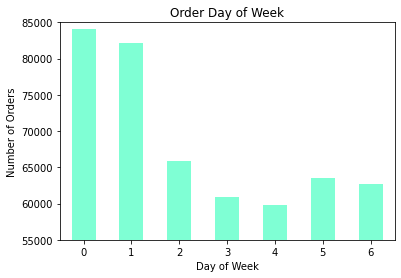

In [ ]:
data_day_of_week = data_order.groupby('order_dow').count()['order_id']
data_day_of_week.plot(kind='bar',
               x='order_dow',
               y='order_id',
               xlabel='Day of Week',
               ylabel='Number of Orders',
               title='Order Day of Week',
               color='aquamarine',
               ylim=[55000,85000])
plt.xticks(rotation=0)
plt.show()


It appears that Sunday (0) and Monday (1) are the most common days of the week to shop for groceries.

The decisions I made regarding the data are similar to the graph above.

### [A4] How long do people wait until placing another order?

30.0


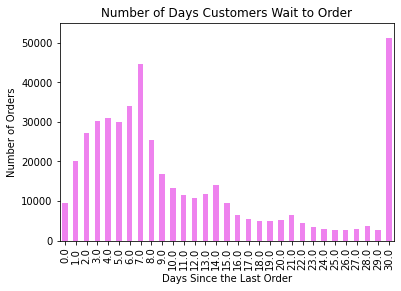

In [ ]:
data_prior_order = data_order.groupby('days_since_prior_order').count()['order_id']
print(data_order['days_since_prior_order'].max())
data_prior_order.plot(x='days_since_prior_order',
                      kind='bar',
                      y='order_id',
                      xlabel='Days Since the Last Order',
                      ylabel='Number of Orders',
                      title='Number of Days Customers Wait to Order',
                      color='violet',
                      ylim=[0, 55000])
#plt.xticks(rotation=0)
plt.show()

It appears that there is a spike in users who wait around a week (7 days) to order again, but many people wait thirty days to order again. Some people wait 0 days, which means they order the same day. I can relate.

Because I wanted to make sure my graph was accurate, I did check that the highest value in this column was 30, and it was. Because the x-axis values are floats instead of integers due to all the NaNs, I left the tick labels as vertical for better readability.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

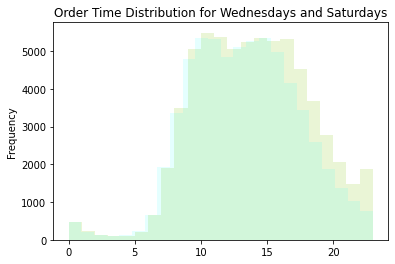

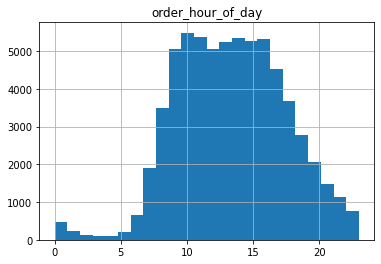

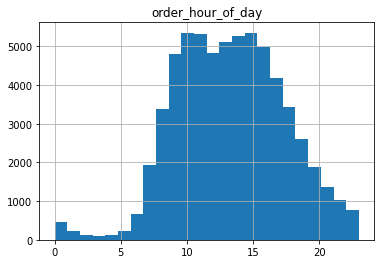

In [ ]:
order_wednesday = data_order[data_order['order_dow'] == 2]
order_saturday = data_order[data_order['order_dow'] == 5]
order_wednesday['order_hour_of_day'].plot(kind='hist',
                                          title='Order Time Distribution for Wednesdays and Saturdays',
                                          bins=23,
                                          color='yellowgreen',
                                          alpha=0.2)
order_saturday['order_hour_of_day'].plot(kind='hist',
                                         bins=24,
                                         color='aqua',
                                         alpha=0.1)
order_wednesday.hist(column='order_hour_of_day', bins=24)
order_saturday.hist(column='order_hour_of_day', bins=24)
plt.show()


The distributions are very similar, but Wednesday is slightly more distributed throughout the day, while Saturday is more concentrated in the middle of the day.

Because the distributions were so similar, I plotted them both on the same graph, but then called the hist() method to get the individual histograms to compare them as well. Using 24 bins seemed logical because there are 24 hours in a day.

### [B2] What's the distribution for the number of orders per customer?

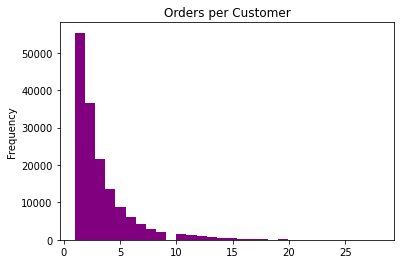

In [ ]:
order_customer = data_order.groupby('user_id')['order_id'].size()
order_customer.plot(kind='hist',
                    title='Orders per Customer',
                    bins=30,
                    alpha=1.0,
                    color='purple')
plt.show()

To get the number of orders for each customer, I counted the number of orders for each customer and plotted that on the histogram.

The distribution is skewed to the left. It seems that customers are on the lower end of number of orders overall.

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
display(data_op.head())
display(data_product.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


,product_id,product_name,aisle_id,department_id,product_lowercase
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [ ]:
most_products = data_op.groupby('product_id')['product_id'].count().sort_values(ascending=False).head(20)
popular_products = data_product.query("product_id in @most_products.index")
popular_products = popular_products.drop(['aisle_id', 'department_id', 'product_lowercase'], axis='columns')

print(popular_products)

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


In [ ]:
# Reviewer's code

display(most_products.values)

popular_products.product_id.values

array([66050, 53297, 37039, 33971, 29773, 24689, 21495, 20018, 19690,
       19600, 19197, 15898, 15292, 14584, 13879, 13675, 12544, 12232,
       11993, 11781])

array([ 5876,  8277, 13176, 16797, 21137, 21903, 22935, 24852, 24964,
       26209, 27845, 27966, 28204, 39275, 40706, 45007, 47209, 47626,
       47766, 49683])

The top twenty products are primarily produce, with the exception of whole milk. 

I created a Series object from the order product DataFrame that I then used to query the product DataFrame via index for the top twenty products and their name.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
display(data_order.head())
display(data_op.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


10.098983215049127
8.0


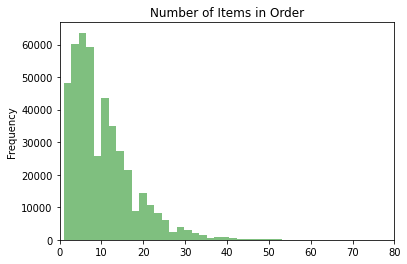

In [ ]:
items_in_order = data_op.groupby('order_id')['product_id'].count()
items_in_order.plot(kind='hist',
                    title='Number of Items in Order',
                    bins=70,
                    alpha=0.5,
                    xlim = [0,80],
                    color='green')
print(items_in_order.mean())
print(items_in_order.median())
plt.show()

People typically buy between 8 and 10 items in an order.

I was actually not entirely sure how to interpret this question. I took the word "typically" to mean averages, so I calculated mean and median, and noted that they differed quite a bit. I then plotted the distribution (which I always interpret as histogram) and see that it skews quite a bit to the left.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
display(data_op.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [ ]:
reordered_products = data_op.query("reordered == 1")
data_merge = reordered_products.merge(data_product, on='product_id')
data_merge = data_merge.drop(['aisle_id', 'department_id', 'product_lowercase', 'add_to_cart_order', 'order_id', 'reordered'], axis='columns')
popular_reordered_products = data_merge.groupby(['product_id', 'product_name'])
most_popular_reordered_products = popular_reordered_products['product_id'].count().sort_values(ascending=False)
print(most_popular_reordered_products.head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: product_id, dtype: int64


Produce wins again! And whole milk/half and half.

I found all the reordered products, then pulled in the product name from the product table and dropped the extraneous information. Then I grouped the information by product ID and product name, then counted the number of products and sorted that information by highest number of products to lowest and grabbed the top twenty results.

### [C3] For each product, what proportion of its orders are reorders?

In [ ]:
display(data_op.head())
display(data_product.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


,product_id,product_name,aisle_id,department_id,product_lowercase
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [ ]:
product_data_merged = data_product.merge(data_op,on='product_id')
product_data_merged = product_data_merged.drop(['aisle_id', 'department_id', 'product_lowercase', 'add_to_cart_order', 'order_id'], axis='columns')
product_data_grouped = product_data_merged.groupby(['product_id', 'product_name'])
product_data_reorder = product_data_grouped['reordered'].mean()
print(product_data_reorder)


product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

It's hard to draw any conclusions from this table since there are so many products, but from what I can see, the proportion of reorders tends to trend between .3 and .5

This information came from two different DataFrames so I merged the two, grouped the information, then grabbed the mean of the reordered products where reorder = 1.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [ ]:
display(data_order.head())
display(data_op.head())


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [ ]:
data_merged = data_order.merge(data_op,on='order_id')
user_reorder_table = data_merged.merge(data_product, on='product_id')
user_reorder_table = user_reorder_table.drop(['order_id',
                                              'order_number', 
                                              'order_dow', 
                                              'order_hour_of_day', 
                                              'days_since_prior_order', 
                                              'aisle_id', 
                                              'department_id', 
                                              'product_lowercase',
                                              'add_to_cart_order'], 
                                               axis='columns')


user_data_grouped = user_reorder_table.groupby('user_id')
user_data_reorder = user_data_grouped['reordered'].mean()
print(user_data_reorder)






user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


### [C5] What are the top 20 items that people put in their carts first? 

In [ ]:
display(data_op.head())
display(data_product.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


,product_id,product_name,aisle_id,department_id,product_lowercase
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [ ]:
first_products = data_op.query("add_to_cart_order == 1")
first_product_merge = first_products.merge(data_product, on='product_id')
first_product_merge = first_product_merge.drop(['aisle_id', 'department_id', 'product_lowercase', 'add_to_cart_order', 'order_id', 'reordered'], axis='columns')
popular_first_products = first_product_merge.groupby(['product_id', 'product_name'])
most_popular_first_products = popular_first_products['product_id'].count().sort_values(ascending=False)
print(most_popular_first_products.head(20))

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

While this list varies slightly compared to the others, produce and dairy are still the main products here. 

I calculated this much like 2.12, but used the add_to_cart_order rather than reordered column.

<h1>Conclusion</h1>
We have learned a lot about users' shopping habits: when they shop, how often they reorder, what they reorder. We also learned they tend to order produce often! We can infer that people tend to place orders in the middle of the day for the middle of the week as well. This data will be useful to Instacart in hiring and planning going forward, and could be useful for grocery stores for the same reasons.